In [14]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [9]:
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [13]:
discriminator = load_model('./baseClf.h5')
_eval = discriminator.evaluate(test_x, test_y)
predictions = discriminator.predict(test_x)
predictions = [np.argmax(p) for p in predictions]
labels = np.reshape(test_y, (len(predictions)))

313/313 [==============================] - 1s 2ms/step - loss: 1.4228 - sparse_categorical_accuracy: 0.6124


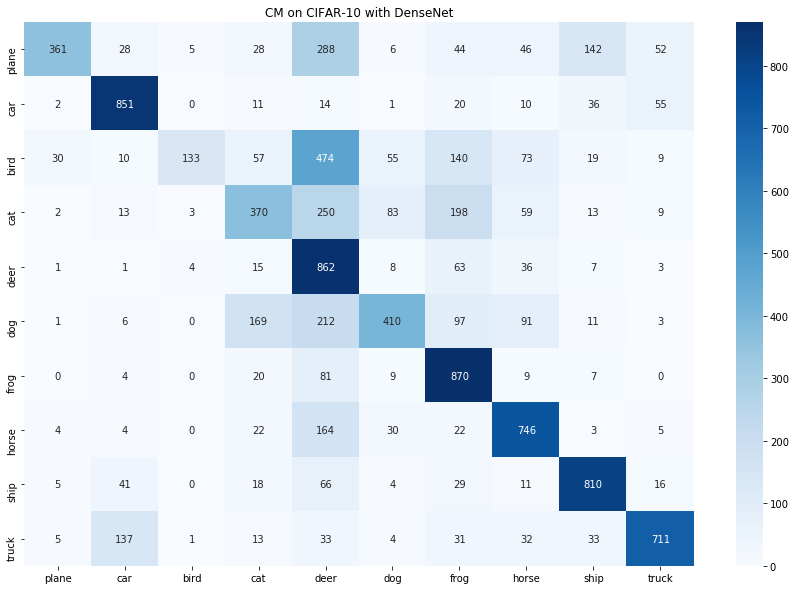

In [15]:
cm = tf.math.confusion_matrix(labels, predictions, num_classes=10)
plt.figure(figsize=(15,10))
plt.title('CM on CIFAR-10 with DenseNet')
sn.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt="d", xticklabels=classes, yticklabels=classes)